# Data Processing

In [12]:
import pandas as pd
import numpy as np

In [13]:
file = '../data/processed_data.csv'

data = pd.read_csv(file, low_memory=True, skipinitialspace=True)
data.tail(10)

C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2487341413.py:3: DtypeWarning: Columns (20,22,23,27,28,29,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file, low_memory=True, skipinitialspace=True)


,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
188626,188626,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...","void WT_NoiseGenerator (S_WT_VOICE *pWTVoice,...",NaN,NaN
188627,188627,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,void WT_VoiceFilter (S_FILTER_CONTROL *pFilter...,NaN,NaN
188628,188628,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -33,6 +33,7 @@\n\n *----------------------...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,"void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...","void WT_VoiceGain (S_WT_VOICE *pWTVoice, S_WT_...",NaN,NaN
188629,188629,None,Remote,Not required,Complete,CVE-2016-0838,https://www.cvedetails.com/cve/CVE-2016-0838/,CWE-119,Low,Complete,...,NaN,"@@ -29,6 +29,7 @@\n\n \n // includes\n #includ...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,EAS_BOOL WT_CheckSampleEnd (S_WT_VOICE *pWTVoi...,NaN,NaN
188630,188630,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,IMPEG2D_ERROR_CODES_T impeg2d_dec_p_b_slice(de...,impeg2d_dec_pnb_mb_params(ps_dec);/~/ ...,"44,46"
188631,188631,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,void impeg2d_dec_p_mb_params(dec_state_t *ps_d...,NaN,NaN
188632,188632,None,Remote,Not required,Complete,CVE-2016-0835,https://www.cvedetails.com/cve/CVE-2016-0835/,CWE-119,Low,Complete,...,NaN,"@@ -60,7 +60,7 @@\n\n *\n * Values Returned :...",Android,https://android.googlesource.com/platform/exte...,https://android.googlesource.com/platform/exte...,1,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,void impeg2d_dec_pnb_mb_params(dec_state_t *ps...,NaN,NaN
188633,188633,None,Remote,Not required,None,CVE-2017-0402,https://www.cvedetails.com/cve/CVE-2017-0402/,CWE-200,Medium,Partial,...,NaN,"@@ -265,8 +265,12 @@\n\n case EQ_PARAM_BAN...",Android,https://android.googlesource.com/platform/hard...,https://android.googlesource.com/platform/hard...,1,int equalizer_get_parameter(effect_context_t *...,int equalizer_get_parameter(effect_context_t *...,if (param2 >= NUM_EQ_BANDS) {/~/ if (pa...,"78,89,90,100"
188634,188634,None,Remote,Not required,None,CVE-2018-9503,https://www.cvedetails.com/cve/CVE-2018-9503/,CWE-125,Low,Complete,...,NaN,"@@ -517,7 +517,16 @@\n\n return (RFC_EVENT...",Android,https://android.googlesource.com/platform/syst...,https://android.googlesource.com/platform/syst...,1,"uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","uint8_t rfc_parse_data(tRFC_MCB* p_mcb, MX_FRA...","RFCOMM_PARSE_LEN_F

## Find vulnerable entries

In [14]:
data_vuls = data[data['target'] == True]
cnt_vuls = data_vuls.shape[0]
cnt_vuls

10900

In [15]:
cnt_data = data.shape[0]
cnt_data

188636

## Calculate percentage of vulnerabilities

In [16]:
cnt_vuls / cnt_data * 100

5.778324391950635

## Extract valid entries

In [17]:
data_valid = data[data['target'] == False]
cnt_valid = data_valid.shape[0]
cnt_valid

177736

## Create a dataset

In [18]:
fraction = 0.10
data_fraction = data.groupby("target").sample(frac=fraction)
data_fraction

,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
129220,129220,None,Remote,Not required,Partial,CVE-2014-3173,https://www.cvedetails.com/cve/CVE-2014-3173/,CWE-119,Low,None,...,NaN,"@@ -3076,7 +3076,20 @@ bool GLES2DecoderImpl::...",Chrome,ee7579229ff7e9e5ae28bf53aea069251499d7da,38f4c0adff7b42decb912e5382a57e35729315a0,0,khronos_uint64_t CityHashForAngle(const char* ...,khronos_uint64_t CityHashForAngle(const char* ...,NaN,NaN
106138,106138,None,Remote,Not required,Partial,CVE-2011-2350,https://www.cvedetails.com/cve/CVE-2011-2350/,CWE-20,Low,Partial,...,NaN,"@@ -235,7 +235,7 @@ EncodedJSValue JSC_HOST_CA...",Chrome,b944f670bb7a8a919daac497a4ea0536c954c201,c37d36f1289ae2b10d3cc1b2818d095ff403064b,0,EncodedJSValue JSC_HOST_CALL jsTestObjPrototyp...,EncodedJSValue JSC_HOST_CALL jsTestObjPrototyp...,NaN,NaN
114683,114683,None,Remote,Not required,Partial,CVE-2012-2817,https://www.cvedetails.com/cve/CVE-2012-2817/,CWE-399,Low,Partial,...,NaN,"@@ -98,6 +98,10 @@ MediaStreamImpl::~MediaStre...",Chrome,9b9a9f33f0a26f40d083be85a539dd7963adfc9b,b38f28a1adcf7544555c32e470b0ef05e0ba93d0,0,MediaStreamImpl::VideoRendererWrapper::~VideoR...,MediaStreamImpl::VideoRendererWrapper::~VideoR...,NaN,NaN
30182,30182,None,Local,Not required,Complete,CVE-2013-3301,https://www.cvedetails.com/cve/CVE-2013-3301/,NaN,Low,Complete,...,NaN,"@@ -2697,7 +2697,7 @@ ftrace_notrace_open(stru...",linux,6a76f8c0ab19f215af2a3442870eeb5f0e81998d,83e03b3fe4daffdebbb42151d5410d730ae50bd1,0,static int ftrace_module_notify_enter(struct n...,static int ftrace_module_notify_enter(struct n...,NaN,NaN
61986,61986,None,Remote,Not required,Partial,CVE-2017-13690,https://www.cvedetails.com/cve/CVE-2017-13690/,CWE-125,Low,Partial,...,NaN,"@@ -1313,6 +1313,7 @@ ikev1_ke_print(netdissec...",tcpdump,8dca25d26c7ca2caf6138267f6f17111212c156e,061e7371a944588f231cb1b66d6fb070b646e376,0,"cookie_sidecheck(int i, const u_char *bp2, int...","cookie_sidecheck(int i, const u_char *bp2, int...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184778,184778,None,Remote,Not required,Partial,CVE-2011-3055,https://www.cvedetails.com/cve/CVE-2011-3055/,NaN,Medium,Partial,...,NaN,"@@ -1230,7 +1230,7 @@ static v8::Handle<v8::Va...",Chrome,e9372a1bfd3588a80fcf49aa07321f0971dd6091,ab5ba409a8d61d35b5202888defb10a57679b9d2,1,static v8::Handle<v8::Value> methodReturningSe...,static v8::Handle<v8::Value> methodReturningSe...,return V8Proxy::throwNotEnoughArgumentsError();,4
183783,183783,None,Remote,Not required,Partial,CVE-2011-2861,https://www.cvedetails.com/cve/CVE-2011-2861/,CWE-20,Medium,Partial,...,NaN,"@@ -34,6 +34,7 @@\n #include ""content/common/w...",Chrome,8262245d384be025f13e2a5b3a03b7e5c98374ce,2469a22063c3539147f55fe899a8dabc12901c01,1,void RenderThread::Init() {\n TRACE_EVENT_BEG...,void RenderThread::Init() {\n TRACE_EVENT_BEG...,NaN,NaN
185760,185760,None,Remote,Not required,None,CVE-2015-1296,https://www.cvedetails.com/cve/CVE-2015-1296/,CWE-254,Low,None,...,NaN,"@@ -234,66 +234,6 @@ bool DownloadController::...",Chrome,5fc08cfb098acce49344d2e89cc27c915903f81c,832443eec1ac13b31d044967e8e36469bc4d28c5,1,void DownloadController::OnDownloadStarted(\n...,void DownloadController::OnDownloadStarted(\nD...,download_item->GetTargetFilePath().BaseN...,"11,12"
187790,187790,None,Remote,Not required,Complete,CVE-2016-2506,https://www.cvedetails.com/cve/CVE-2016-2506/,CWE-119,Low,Complete,...,NaN,"@@ -200,7 +200,17 @@\n\n conti...",Android,https://android.googlesource.com/platform/fram...,https://android.googlesource.com/platform/fram...,1,"status_t DRMSource::read(MediaBuffer **buffer,...","status_t DRMSource::read(MediaBuffer **buffer,...",CHECK(dstOffset + 4 <= (*buffer)->size());,78


In [19]:
data_fraction.groupby("target").size()

target
0    17774
1     1090
dtype: int64

In [20]:
data_target_grouped = data.groupby("target")
 
data_balanced = data_target_grouped.apply(lambda x: x.sample(data_target_grouped.size().min()).reset_index(drop=True))
 
data_balanced = data_balanced.droplevel("target")
data_balanced.groupby("target").size()

target
0    10900
1    10900
dtype: int64

In [21]:
#data_balanced.to_csv('../data/balanced_data.csv')
sample_size = 100
data_balanced_mini = data_balanced.groupby('target').sample(n=sample_size)
data_balanced_mini.groupby("target").size()

target
0    100
1    100
dtype: int64

In [22]:
data_balanced_mini.to_csv('../data/balanced_data_mini.csv')

# Features

In [23]:
data = pd.read_csv('../data/balanced_data.csv')

In [24]:
feature_columns = ['processed_func']
target_columns = ['target']

target = data[target_columns]
features = data[feature_columns]
features

,processed_func
0,void CairoOutputDev::drawImageMaskRegular(GfxS...
1,coolkey_add_object(coolkey_private_data_t *pri...
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...
3,OscillatorNode* AudioContext::createOscillator...
4,void FrameView::setMediaType(const AtomicStrin...
...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...
21796,static void Process_ipfix_template_add(exporte...
21797,status_t NuPlayer::GenericSource::initFromData...
21798,void MigrationTest::SetUpVersion76Database() {...


### Codebert tokenizing

In [25]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")

features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)
features['function_tokenized']

Token indices sequence length is longer than the specified maximum sequence length for this model (867 > 512). Running this sequence through the model will result in indexing errors
C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\1113275987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized'] = features['processed_func'].apply(tokenizer.tokenize)


0        [void, ĠCairo, Output, Dev, ::, draw, Image, M...
1        [cool, key, _, add, _, object, (, cool, key, _...
2        [void, ĠCS, ound, File, ::, Fine, Volume, Up, ...
3        [O, scill, ator, Node, *, ĠAudio, Context, ::,...
4        [void, ĠFrame, View, ::, set, Media, Type, (, ...
                               ...                        
21795    [void, ĠPage, Handler, ::, Set, R, end, erer, ...
21796    [static, Ġvoid, ĠProcess, _, ip, fix, _, templ...
21797    [status, _, t, ĠNu, Player, ::, Generic, Sourc...
21798    [void, ĠMigration, Test, ::, Set, Up, Version,...
21799    [k, rb, 5, _, g, ss, _, wrap, _, size, _, limi...
Name: function_tokenized, Length: 21800, dtype: object

### Codebert Tokens to ids

In [26]:
features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)
features['function_tokenized_ids']

C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\122038163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['function_tokenized_ids'] = features['function_tokenized'].apply(tokenizer.convert_tokens_to_ids)


0        [47908, 14794, 48293, 30504, 38304, 24686, 853...
1        [24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...
2        [47908, 7038, 9834, 9966, 38304, 45089, 39781,...
3        [673, 46003, 2630, 48271, 3226, 20555, 48522, ...
4        [47908, 37280, 22130, 38304, 8738, 18801, 4011...
                               ...                        
21795    [47908, 7086, 49191, 38304, 28512, 500, 1397, ...
21796    [42653, 13842, 19149, 1215, 1588, 23032, 1215,...
21797    [29552, 1215, 90, 12907, 35605, 38304, 49144, ...
21798    [47908, 26742, 34603, 38304, 28512, 10926, 473...
21799    [330, 20815, 245, 1215, 571, 7485, 1215, 45705...
Name: function_tokenized_ids, Length: 21800, dtype: object

### Split lines and calculate LOC

In [27]:
features['lines'] = features['processed_func'].apply(str.splitlines)
features['loc'] = features['lines'].apply(len);
features


C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2104767442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['lines'] = features['processed_func'].apply(str.splitlines)
C:\Users\kevwil\AppData\Local\Temp\ipykernel_4156\2104767442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['loc'] = features['lines'].apply(len);


,processed_func,function_tokenized,function_tokenized_ids,lines,loc
0,void CairoOutputDev::drawImageMaskRegular(GfxS...,"[void, ĠCairo, Output, Dev, ::, draw, Image, M...","[47908, 14794, 48293, 30504, 38304, 24686, 853...",[void CairoOutputDev::drawImageMaskRegular(Gfx...,85
1,coolkey_add_object(coolkey_private_data_t *pri...,"[cool, key, _, add, _, object, (, cool, key, _...","[24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...",[coolkey_add_object(coolkey_private_data_t *pr...,33
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...,"[void, ĠCS, ound, File, ::, Fine, Volume, Up, ...","[47908, 7038, 9834, 9966, 38304, 45089, 39781,...",[void CSoundFile::FineVolumeUp(ModChannel *pCh...,20
3,OscillatorNode* AudioContext::createOscillator...,"[O, scill, ator, Node, *, ĠAudio, Context, ::,...","[673, 46003, 2630, 48271, 3226, 20555, 48522, ...",[OscillatorNode* AudioContext::createOscillato...,9
4,void FrameView::setMediaType(const AtomicStrin...,"[void, ĠFrame, View, ::, set, Media, Type, (, ...","[47908, 37280, 22130, 38304, 8738, 18801, 4011...",[void FrameView::setMediaType(const AtomicStri...,6
...,...,...,...,...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...,"[void, ĠPage, Handler, ::, Set, R, end, erer, ...","[47908, 7086, 49191, 38304, 28512, 500, 1397, ...",[void PageHandler::SetRenderer(RenderProcessHo...,24
21796,static void Process_ipfix_template_add(exporte...,"[static, Ġvoid, ĠProcess, _, ip, fix, _, templ...","[42653, 13842, 19149, 1215, 1588, 23032, 1215,...",[static void Process_ipfix_template_add(export...,182
21797,status_t NuPlayer::GenericSource::initFromData...,"[status, _, t, ĠNu, Player, ::, Generic, Sourc...","[29552, 1215, 90, 12907, 35605, 38304, 49144, ...",[status_t NuPlayer::GenericSource::initFromDat...,142
21798,void MigrationTest::SetUpVersion76Database() {...,"[void, ĠMigration, Test, ::, Set, Up, Version,...","[47908, 26742, 34603, 38304, 28512, 10926, 473...",[void MigrationTest::SetUpVersion76Database() ...,97


In [28]:
size = 50

## Determine most frequent tokens

### Combine whole column to one big list

In [29]:
tl = features['function_tokenized_ids'].to_list()
tokens_list = [item for sublist in tl for item in sublist]
tokens_list

[47908,
 14794,
 48293,
 30504,
 38304,
 24686,
 8532,
 47661,
 46309,
 1640,
 534,
 44830,
 13360,
 1009,
 4897,
 6,
 35671,
 1009,
 13043,
 6,
 16183,
 1009,
 6031,
 6,
 50118,
 50117,
 50117,
 50117,
 50117,
 1437,
 1437,
 1437,
 6979,
 22523,
 6,
 6979,
 6958,
 6,
 7216,
 8110,
 11,
 9942,
 6,
 50118,
 50117,
 50117,
 50117,
 50117,
 1437,
 1437,
 1437,
 7216,
 8110,
 39491,
 20470,
 571,
 43,
 25522,
 50118,
 1437,
 39023,
 16224,
 1009,
 47438,
 131,
 50118,
 1437,
 39023,
 16224,
 1009,
 31549,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 42130,
 1215,
 90,
 1009,
 20094,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 43106,
 1215,
 90,
 1009,
 43106,
 131,
 50118,
 1437,
 6979,
 3023,
 6,
 1423,
 131,
 50118,
 1437,
 2960,
 36757,
 1009,
 34252,
 29116,
 131,
 50118,
 1437,
 272,
 4272,
 271,
 1009,
 642,
 3181,
 131,
 50118,
 1437,
 6056,
 4712,
 1215,
 9244,
 15072,
 1215,
 90,
 36173,
 131,
 50118,
 1437,
 6979,
 11,
 9942,
 1215,
 5881,
 131,
 50118,
 1437,
 6979,
 3236,
 1215,
 

### Find most frequent tokens

In [30]:
from collections import Counter
c = Counter(tokens_list)

most_frequent_tokens = c.most_common(size)


### Convert tuple list to token list

In [31]:
mft = [i[0] for i in most_frequent_tokens]
mft

[1437,
 1215,
 50118,
 50117,
 6,
 1640,
 131,
 46613,
 43,
 5457,
 36,
 4397,
 4,
 25522,
 24303,
 1594,
 321,
 1009,
 29,
 50140,
 642,
 90,
 10975,
 114,
 38304,
 45994,
 35,
 134,
 1178,
 3226,
 5214,
 288,
 359,
 20094,
 48404,
 118,
 176,
 45152,
 30921,
 438,
 282,
 22,
 35524,
 417,
 5,
 119,
 35122,
 23999,
 1297,
 49051]

## Use first n tokens 

In [32]:
first_ones = features['function_tokenized_ids'].str[:size]
first_ones

0        [47908, 14794, 48293, 30504, 38304, 24686, 853...
1        [24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...
2        [47908, 7038, 9834, 9966, 38304, 45089, 39781,...
3        [673, 46003, 2630, 48271, 3226, 20555, 48522, ...
4        [47908, 37280, 22130, 38304, 8738, 18801, 4011...
                               ...                        
21795    [47908, 7086, 49191, 38304, 28512, 500, 1397, ...
21796    [42653, 13842, 19149, 1215, 1588, 23032, 1215,...
21797    [29552, 1215, 90, 12907, 35605, 38304, 49144, ...
21798    [47908, 26742, 34603, 38304, 28512, 10926, 473...
21799    [330, 20815, 245, 1215, 571, 7485, 1215, 45705...
Name: function_tokenized_ids, Length: 21800, dtype: object

## Convert array columns to normal columns

In [33]:
column_names = ["token_" + str(i+1) for i in range(size)]
new_col = pd.DataFrame(first_ones.to_list(), columns=column_names).replace(np.nan, 0)
new_col

,token_1,token_2,token_3,token_4,token_5,token_6,token_7,token_8,token_9,token_10,...,token_41,token_42,token_43,token_44,token_45,token_46,token_47,token_48,token_49,token_50
0,47908,14794,48293,30504,38304,24686,8532.0,47661.0,46309.0,1640.0,...,11.0,9942.0,6.0,50118.0,50117.0,50117.0,50117.0,50117.0,1437.0,1437.0
1,24336,5282,1215,4917,1215,40412,1640.0,24336.0,5282.0,1215.0,...,1606.0,1215.0,705.0,134.0,1215.0,14760.0,43.0,50118.0,45152.0,50118.0
2,47908,7038,9834,9966,38304,45089,39781.0,10926.0,1640.0,30597.0,...,48710.0,1215.0,30440.0,43.0,50118.0,50117.0,45152.0,50118.0,50117.0,50117.0
3,673,46003,2630,48271,3226,20555,48522.0,38304.0,32845.0,673.0,...,48271.0,38304.0,32845.0,1640.0,9226.0,6.0,475.0,1215.0,31549.0,8111.0
4,47908,37280,22130,38304,8738,18801,40118.0,1640.0,20836.0,30169.0,...,46613.0,5535.0,48382.0,250.0,45700.0,154.0,33977.0,49108.0,47006.0,50118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,47908,7086,49191,38304,28512,500,1397.0,7160.0,1640.0,48440.0,...,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,46804.0,46766.0
21796,42653,13842,19149,1215,1588,23032,1215.0,48790.0,1215.0,4917.0,...,90.0,1009.0,17884.0,43.0,25522.0,50118.0,46797.0,1215.0,48235.0,1215.0
21797,29552,1215,90,12907,35605,38304,49144.0,7061.0,38304.0,25153.0,...,49528.0,15698.0,34759.0,131.0,50118.0,46787.0,16.0,43755.0,28022.0,36757.0
21798,47908,26742,34603,38304,28512,10926,47322.0,5067.0,49187.0,43048.0,...,6997.0,9162.0,1640.0,41011.0,4.0,48290.0,48132.0,49291.0,50118.0,1437.0


## Join columns to feature df

In [61]:
features_tokens_added = features.join(new_col)
features_tokens_added

,processed_func,function_tokenized,function_tokenized_ids,lines,loc,token_1,token_2,token_3,token_4,token_5,...,token_41,token_42,token_43,token_44,token_45,token_46,token_47,token_48,token_49,token_50
0,void CairoOutputDev::drawImageMaskRegular(GfxS...,"[void, ĠCairo, Output, Dev, ::, draw, Image, M...","[47908, 14794, 48293, 30504, 38304, 24686, 853...",[void CairoOutputDev::drawImageMaskRegular(Gfx...,85,47908,14794,48293,30504,38304,...,11.0,9942.0,6.0,50118.0,50117.0,50117.0,50117.0,50117.0,1437.0,1437.0
1,coolkey_add_object(coolkey_private_data_t *pri...,"[cool, key, _, add, _, object, (, cool, key, _...","[24336, 5282, 1215, 4917, 1215, 40412, 1640, 2...",[coolkey_add_object(coolkey_private_data_t *pr...,33,24336,5282,1215,4917,1215,...,1606.0,1215.0,705.0,134.0,1215.0,14760.0,43.0,50118.0,45152.0,50118.0
2,void CSoundFile::FineVolumeUp(ModChannel *pChn...,"[void, ĠCS, ound, File, ::, Fine, Volume, Up, ...","[47908, 7038, 9834, 9966, 38304, 45089, 39781,...",[void CSoundFile::FineVolumeUp(ModChannel *pCh...,20,47908,7038,9834,9966,38304,...,48710.0,1215.0,30440.0,43.0,50118.0,50117.0,45152.0,50118.0,50117.0,50117.0
3,OscillatorNode* AudioContext::createOscillator...,"[O, scill, ator, Node, *, ĠAudio, Context, ::,...","[673, 46003, 2630, 48271, 3226, 20555, 48522, ...",[OscillatorNode* AudioContext::createOscillato...,9,673,46003,2630,48271,3226,...,48271.0,38304.0,32845.0,1640.0,9226.0,6.0,475.0,1215.0,31549.0,8111.0
4,void FrameView::setMediaType(const AtomicStrin...,"[void, ĠFrame, View, ::, set, Media, Type, (, ...","[47908, 37280, 22130, 38304, 8738, 18801, 4011...",[void FrameView::setMediaType(const AtomicStri...,6,47908,37280,22130,38304,8738,...,46613.0,5535.0,48382.0,250.0,45700.0,154.0,33977.0,49108.0,47006.0,50118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21795,void PageHandler::SetRenderer(RenderProcessHos...,"[void, ĠPage, Handler, ::, Set, R, end, erer, ...","[47908, 7086, 49191, 38304, 28512, 500, 1397, ...",[void PageHandler::SetRenderer(RenderProcessHo...,24,47908,7086,49191,38304,28512,...,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,1437.0,46804.0,46766.0
21796,static void Process_ipfix_template_add(exporte...,"[static, Ġvoid, ĠProcess, _, ip, fix, _, templ...","[42653, 13842, 19149, 1215, 1588, 23032, 1215,...",[static void Process_ipfix_template_add(export...,182,42653,13842,19149,1215,1588,...,90.0,1009.0,17884.0,43.0,25522.0,50118.0,46797.0,1215.0,48235.0,1215.0
21797,status_t NuPlayer::GenericSource::initFromData...,"[status, _, t, ĠNu, Player, ::, Generic, Sourc...","[29552, 1215, 90, 12907, 35605, 38304, 49144, ...",[status_t NuPlayer::GenericSource::initFromDat...,142,29552,1215,90,12907,35605,...,49528.0,15698.0,34759.0,131.0,50118.0,46787.0,16.0,43755.0,28022.0,36757.0
21798,void MigrationTest::SetUpVersion76Database() {...,"[void, ĠMigration, Test, ::, Set, Up, Version,...","[47908, 26742, 34603, 38304, 28512, 10926, 473...",[void MigrationTest::SetUpVersion76Database() ...,97,47908,26742,34603,38304,28512,...,6997.0,9162.0,1640.0,41011.0,4.0,48290.0,48132.0,49291.0,50118.0,1437.0


In [ ]:

df = pd.read_csv('../data/balanced_data.csv')


In [ ]:
df['target'].value_counts()
df_target = df['target']
df.head(5)
df = df.drop(['Unnamed', 'index'])

## Prepare X and y

In [ ]:
X = df
X
y = target
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_func'], df['target'], test_size=0.33, random_state=42)

X_train

In [ ]:
# only random forest 
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.auc(fpr, tpr), 2)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [ ]:

model.fit(X_train, y_train, epochs=10)

In [155]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=METRICS)

In [156]:

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
457/457 [==============================] - 1509s 3s/step - loss: 0.6692 - accuracy: 0.5950 - precision: 0.5893 - recall: 0.6304
Epoch 2/10
457/457 [==============================] - 1498s 3s/step - loss: 0.6568 - accuracy: 0.6199 - precision: 0.6084 - recall: 0.6759
Epoch 3/10
457/457 [==============================] - 1497s 3s/step - loss: 0.6526 - accuracy: 0.6272 - precision: 0.6164 - recall: 0.6762
Epoch 4/10
457/457 [==============================] - 1504s 3s/step - loss: 0.6467 - accuracy: 0.6301 - precision: 0.6184 - recall: 0.6819
Epoch 5/10
457/457 [==============================] - 1519s 3s/step - loss: 0.6482 - accuracy: 0.6317 - precision: 0.6199 - recall: 0.6836
Epoch 6/10
457/457 [==============================] - 1516s 3s/step - loss: 0.6462 - accuracy: 0.6310 - precision: 0.6206 - recall: 0.6765
Epoch 7/10
457/457 [==============================] - 1512s 3s/step - loss: 0.6459 - accuracy: 0.6362 - precision: 0.6259 - recall: 0.6796
Epoch 8/10
457/457 [=======

In [29]:
model_list = ['LR', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr), 2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [30]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'AUC': auc_list})
result_df

,Model,Accuracy,AUC
0,LR,0.632472,0.63
1,SVM,0.616625,0.62
2,KNN,0.589797,0.59
3,Decision Tree,0.615235,0.62
4,Random Forest,0.721296,0.72
5,Naive Bayes,0.577704,0.58


In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

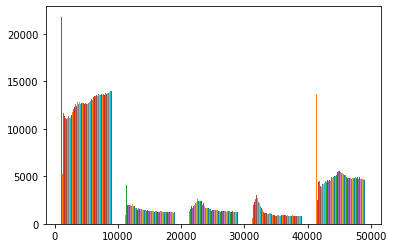

In [39]:

plt.hist(X, 5)
plt.show()

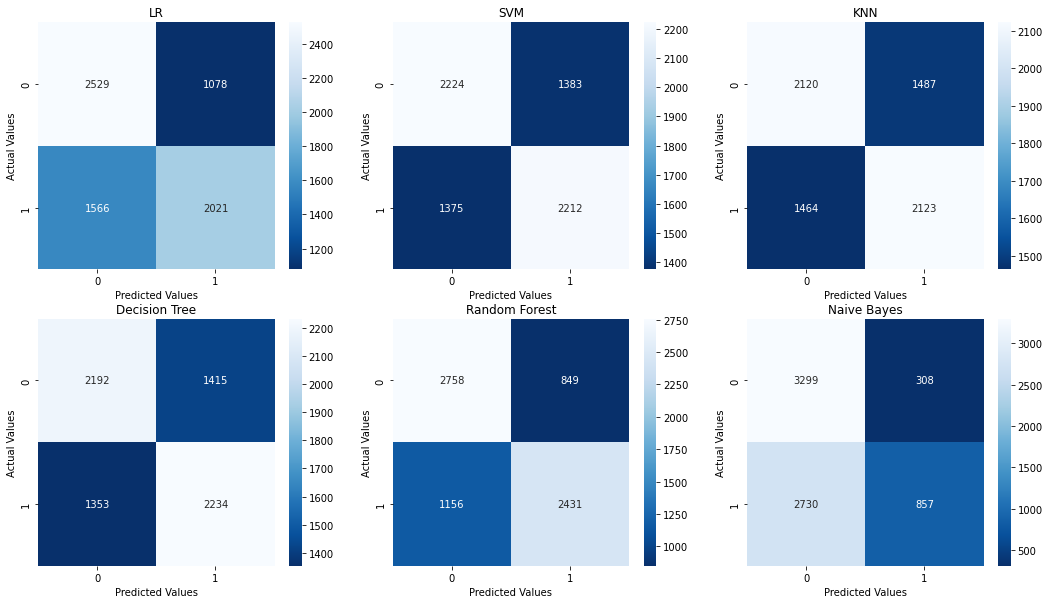

In [35]:
fig = plt.figure(figsize = (18,10))
for i,cm in enumerate(cm_list):
    model = model_list[i];
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', fmt='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')